In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Indonesia Dataset Matrix
data = {
    'Dataset': [
        'OLID', 'OLID', 'OLID', 'OLID',
        'TweetEval', 'TweetEval', 'TweetEval', 'TweetEval',
        'Sushil', 'Sushil', 'Sushil', 'Sushil'
    ],
    'Model': ['IB-WE', 'IB-ED', 'MB-WE', 'MB-ED'] * 3,
    'TP': [62, 76, 69, 68, 21, 23, 4, 27, 1056, 734, 1414, 1274],
    'FP': [12, 33, 11, 5, 14, 15, 6, 26, 247, 156, 801, 155],
    'FN': [47, 33, 40, 42, 12, 10, 29, 6, 624, 973, 266, 433],
    'TN': [98, 77, 99, 105, 19, 18, 27, 7, 1433, 1552, 879, 1553]
}

df_indo = pd.DataFrame(data)
df_indo

df_indo = pd.DataFrame(data)

df_indo = pd.concat([
    df_indo[df_indo['Dataset'] == 'TweetEval'],
    df_indo[df_indo['Dataset'] == 'OLID'],
    df_indo[df_indo['Dataset'] == 'Sushil']
], ignore_index=True)

df_indo

,Dataset,Model,TP,FP,FN,TN
0,TweetEval,IB-WE,21,14,12,19
1,TweetEval,IB-ED,23,15,10,18
2,TweetEval,MB-WE,4,6,29,27
3,TweetEval,MB-ED,27,26,6,7
4,OLID,IB-WE,62,12,47,98
5,OLID,IB-ED,76,33,33,77
6,OLID,MB-WE,69,11,40,99
7,OLID,MB-ED,68,5,42,105
8,Sushil,IB-WE,1056,247,624,1433
9,Sushil,IB-ED,734,156,973,1552


In [3]:
# English Dataset Matrix
data_eng = {
    'Dataset': [
        'OLID', 'OLID', 'OLID', 'OLID',
        'TweetEval', 'TweetEval', 'TweetEval', 'TweetEval',
        'Sushil', 'Sushil', 'Sushil', 'Sushil'
    ],
    'Model': ['IB-WE', 'IB-ED', 'MB-WE', 'MB-ED'] * 3,
    'TP': [63, 46, 64, 75, 24, 28, 9, 7, 927, 919, 1313, 1304],
    'FP': [20, 26, 4, 5, 18, 24, 4, 1, 286, 270, 189, 173],
    'FN': [47, 64, 46, 35, 10, 6, 25, 27, 780, 788, 394, 403],
    'TN': [90, 84, 106, 105, 16, 10, 30, 33, 1422, 1438, 1519, 1535]
}

df_english = pd.DataFrame(data_eng)

df_english = pd.concat([
    df_english[df_english['Dataset'] == 'TweetEval'],
    df_english[df_english['Dataset'] == 'OLID'],
    df_english[df_english['Dataset'] == 'Sushil']
], ignore_index=True)

df_english

,Dataset,Model,TP,FP,FN,TN
0,TweetEval,IB-WE,24,18,10,16
1,TweetEval,IB-ED,28,24,6,10
2,TweetEval,MB-WE,9,4,25,30
3,TweetEval,MB-ED,7,1,27,33
4,OLID,IB-WE,63,20,47,90
5,OLID,IB-ED,46,26,64,84
6,OLID,MB-WE,64,4,46,106
7,OLID,MB-ED,75,5,35,105
8,Sushil,IB-WE,927,286,780,1422
9,Sushil,IB-ED,919,270,788,1438


In [4]:
df_indo.to_csv('matrix-indo.csv', index=False)
df_english.to_csv('matrix-english.csv', index=False)

In [5]:
def show_confusion_matrices(df, title_prefix=''):
    datasets = df['Dataset'].unique()
    models = ['IB-WE', 'IB-ED', 'MB-WE', 'MB-ED']
    
    for dataset in datasets:
        df_subset = df[df['Dataset'] == dataset]
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        axs = axs.flatten()
        fig.suptitle(f'{title_prefix}{dataset} - Confusion Matrices', fontsize=16)

        for idx, model in enumerate(models):
            row = df_subset[df_subset['Model'] == model].iloc[0]
            matrix = [[row['TP'], row['FP']], [row['FN'], row['TN']]]

            sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[idx])
            axs[idx].set_title(model)
            axs[idx].set_xlabel('Actual')
            axs[idx].set_ylabel('Predicted')
            axs[idx].set_xticklabels(['Positive', 'Negative'])
            axs[idx].set_yticklabels(['Positive', 'Negative'], rotation=0)

        plt.tight_layout(rect=[0, 0, 1, 0.90])
        plt.show()

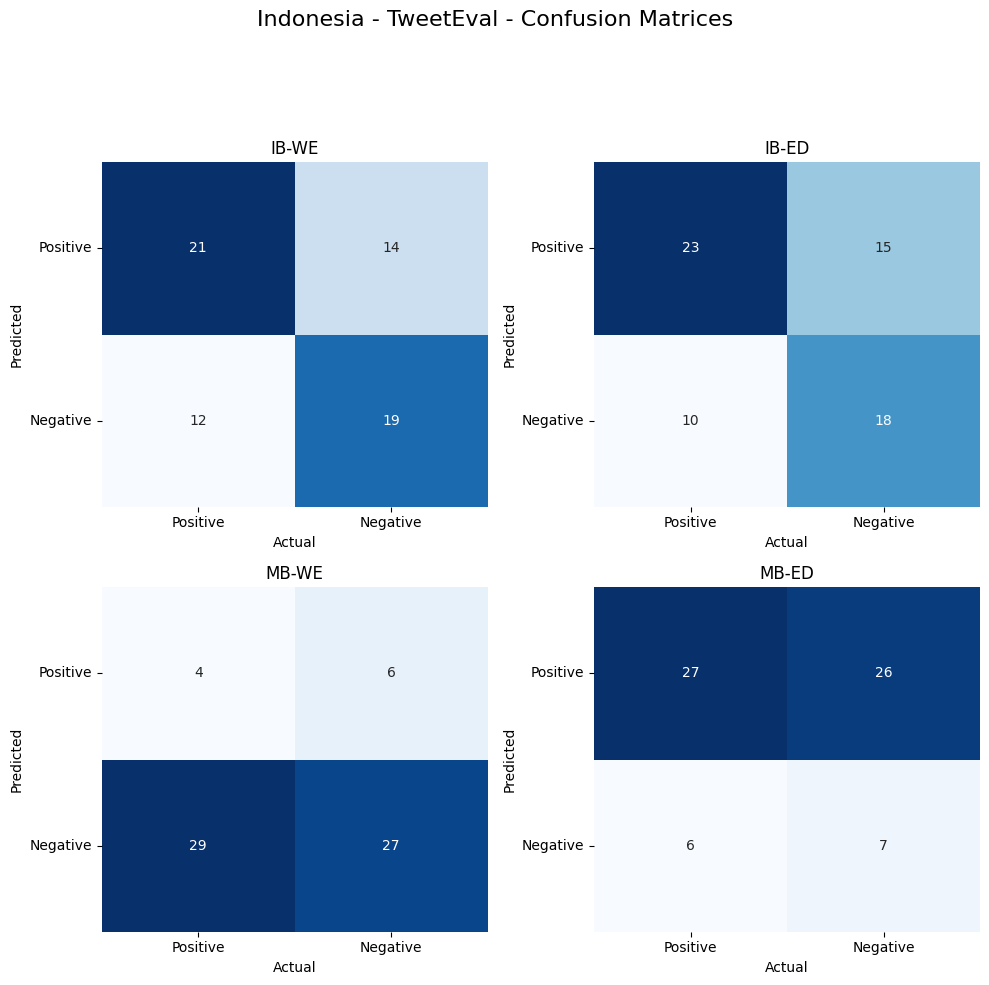

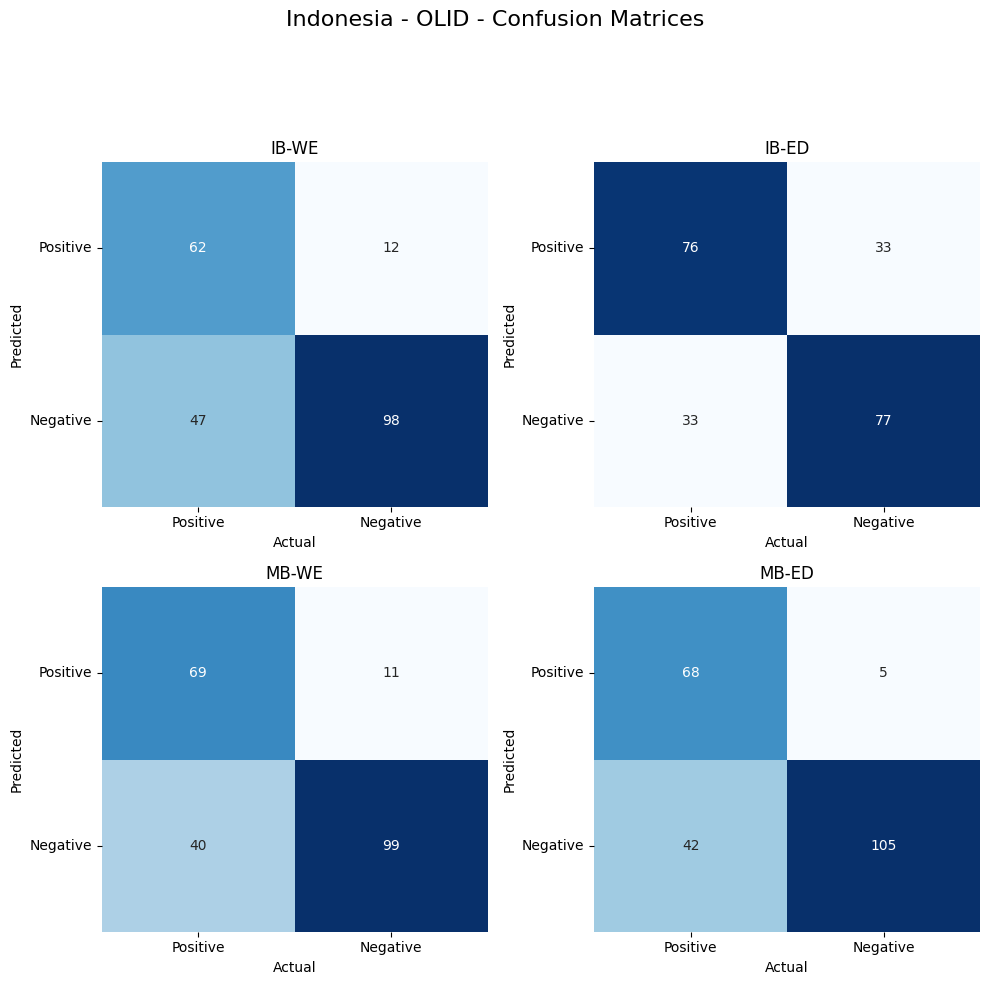

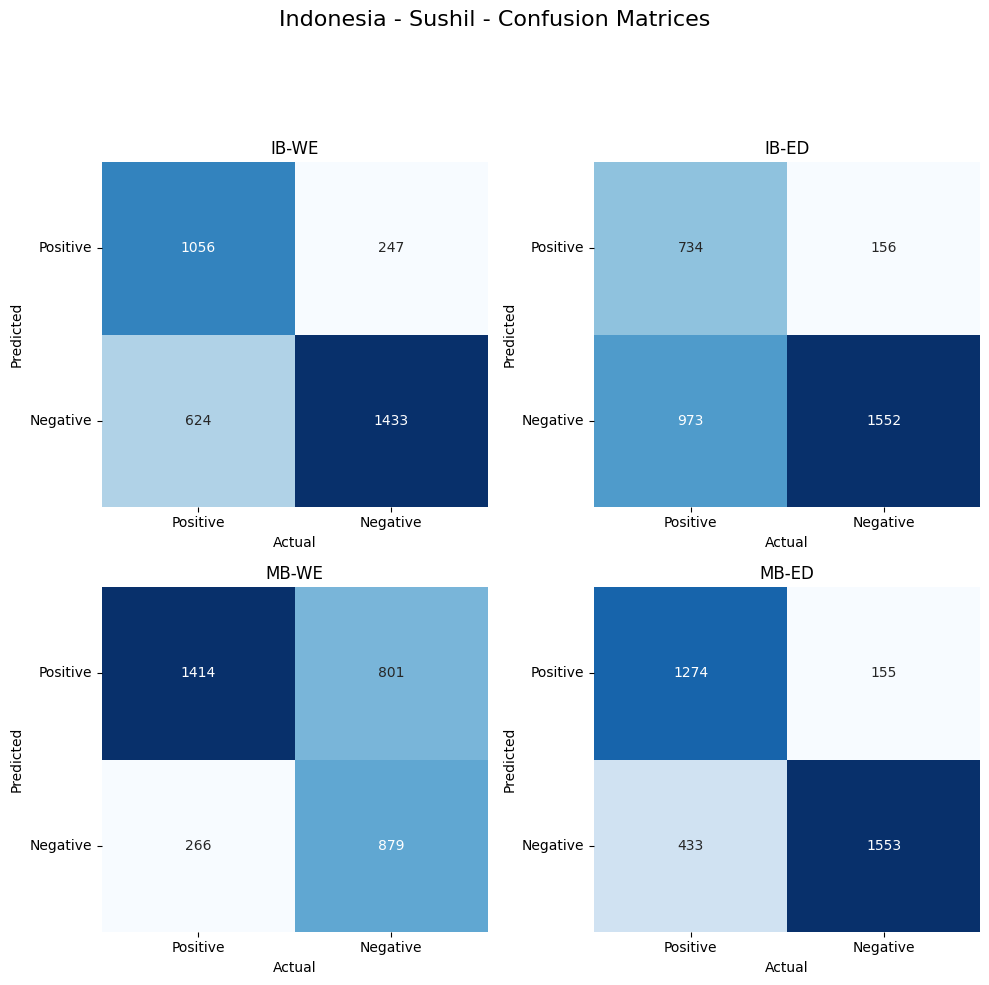

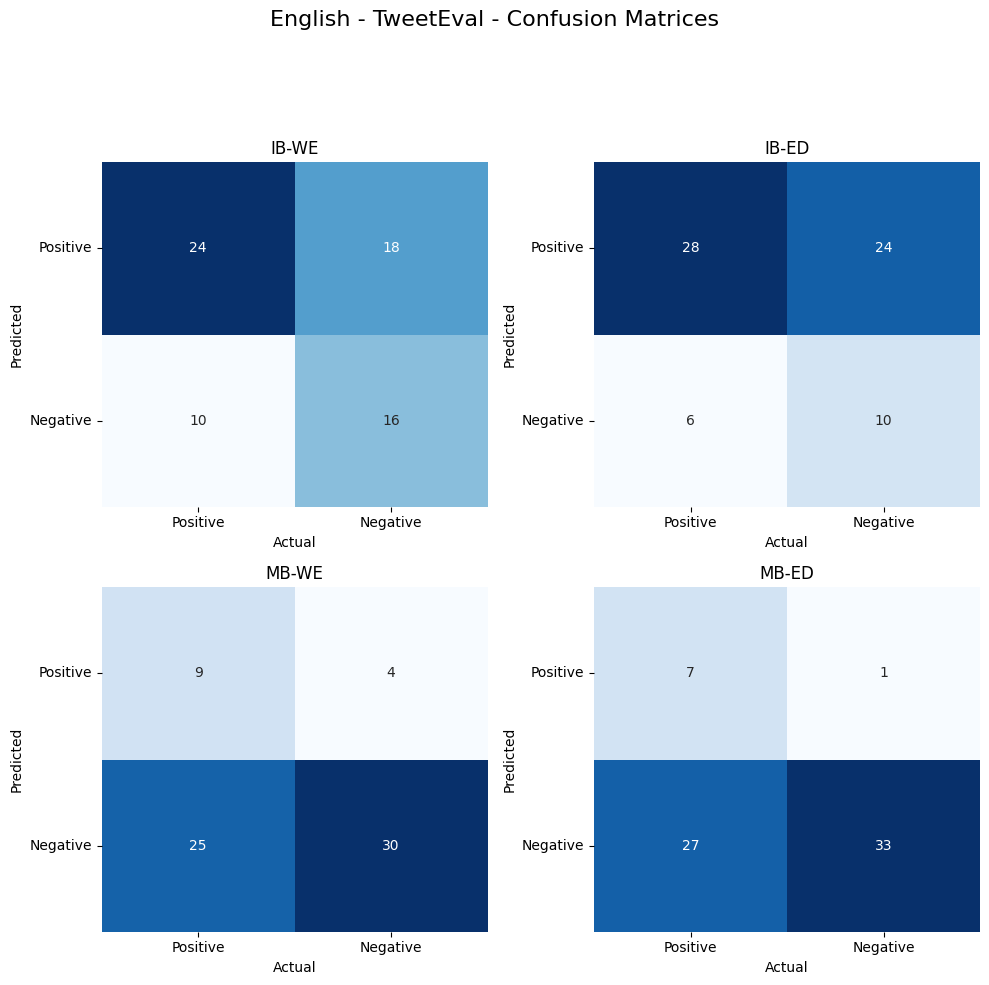

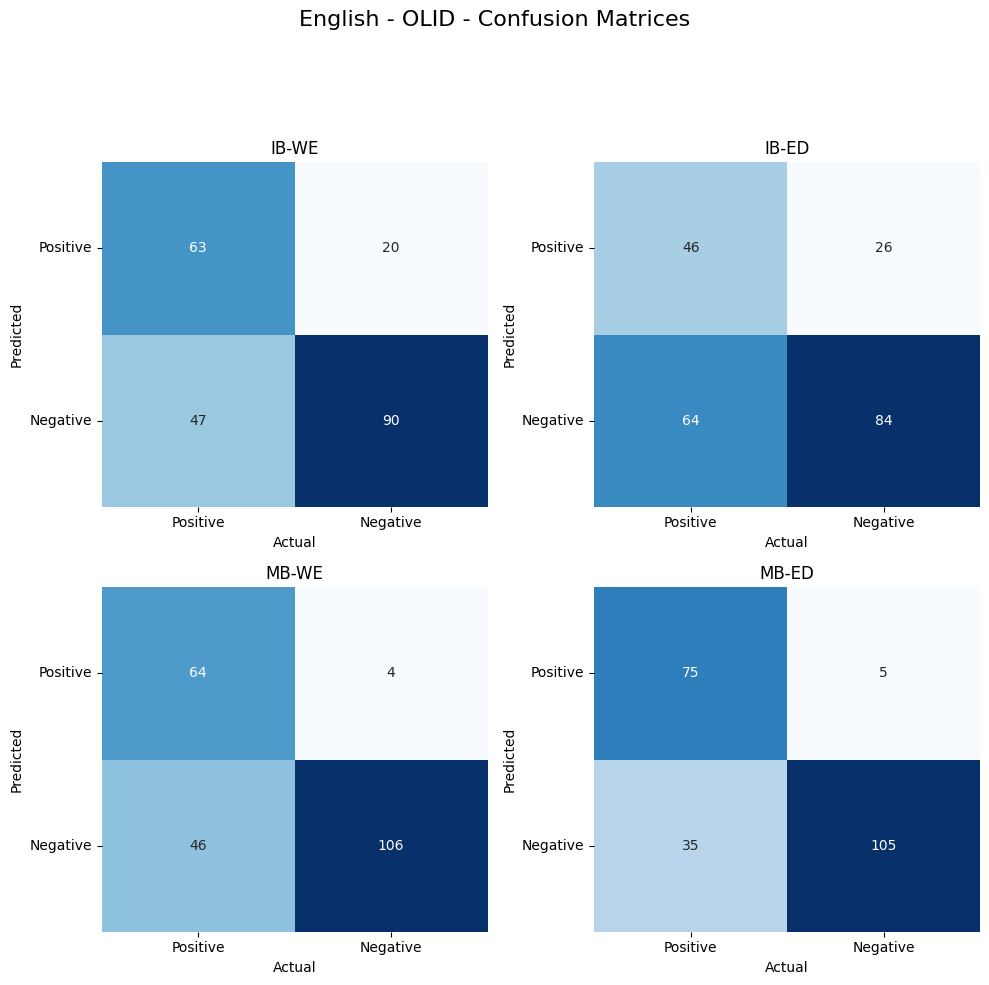

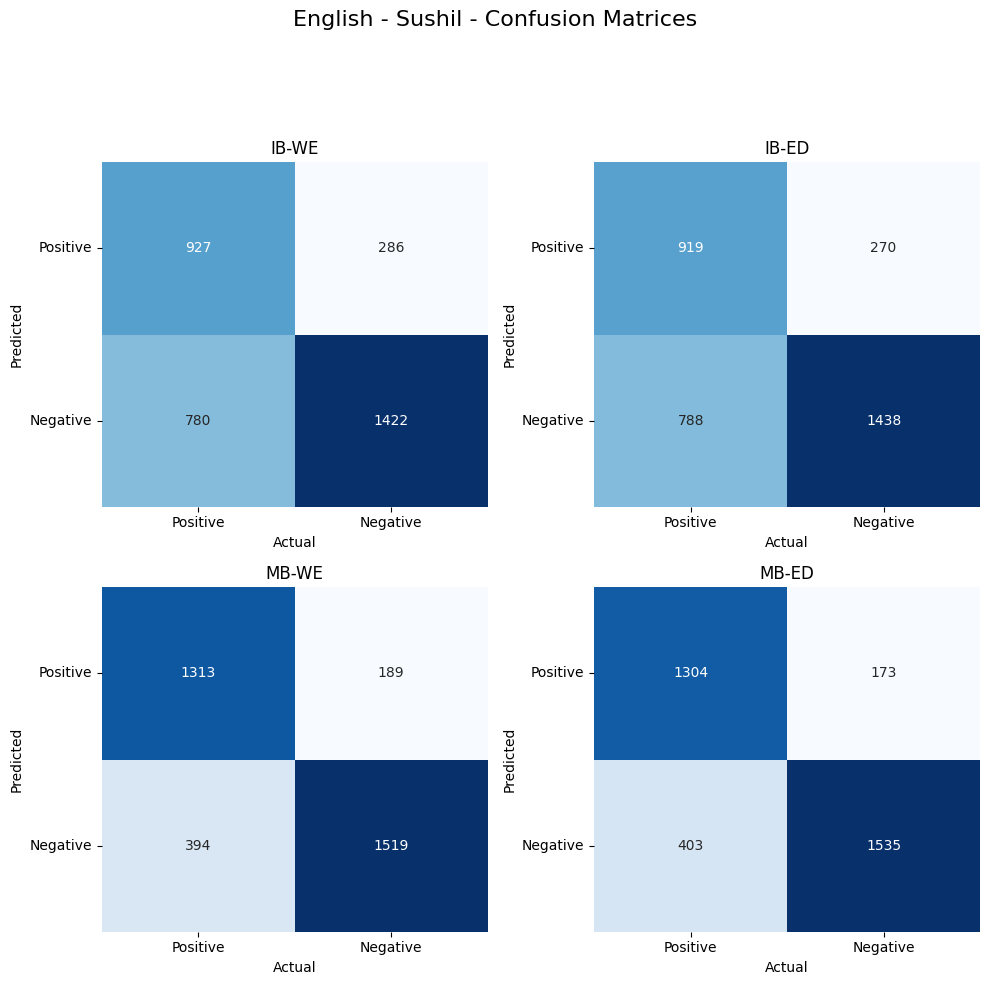

In [6]:
show_confusion_matrices(df_indo, title_prefix='Indonesia - ')
show_confusion_matrices(df_english, title_prefix='English - ')